In [13]:
import csv

txt_file = r"nov_temp_new.txt"
csv_file = r"novembercsv.csv"

# use 'with' if the program isn't going to immediately terminate
# so you don't leave files open
# the 'b' is necessary on Windows
# it prevents \x1a, Ctrl-z, from ending the stream prematurely
# and also stops Python converting to / from different line terminators
# On other platforms, it has no effect
in_txt = csv.reader(open(txt_file, "r"), delimiter = '\t')
out_csv = csv.writer(open(csv_file, 'w'))

out_csv.writerows(in_txt)

            aravali_25  aravali_244  aravali_243  aravali_234  aravali_211  \
TS                                                                           
2016-11-01    3.033250     6.553799     8.773014     7.064097     6.605406   
2016-11-02    3.539000     7.586417     7.318865     7.452438     7.025406   
2016-11-03    3.365377     7.678552     5.810641     9.142090     7.556072   
2016-11-04    2.978352     7.060365     6.320713     9.401681     7.051668   
2016-11-05    3.892715     5.827507     5.910601     6.302028     6.397712   
2016-11-06         NaN          NaN          NaN          NaN          NaN   
2016-11-07         NaN          NaN          NaN          NaN          NaN   
2016-11-08         NaN          NaN          NaN          NaN          NaN   
2016-11-09         NaN          NaN          NaN          NaN          NaN   
2016-11-10    3.214272     7.259714     5.652846     7.369836     5.701307   
2016-11-11    3.527583     8.674125     6.525646     5.047379   

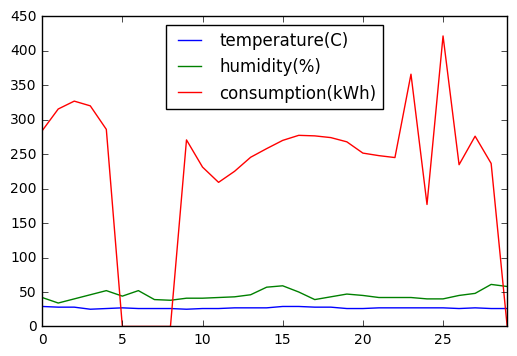

In [2]:
import pandas as pd
import os
import numpy as np
import datetime

from collections import defaultdict
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from pymongo import MongoClient

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)


client=MongoClient('127.0.0.1:27017')
db=client.test4
DF = pd.DataFrame()
for flat_name in db.collection_names():
    if flat_name[:7] == 'aravali' and flat_name[-3:] == 'Nov' and flat_name[:11] != 'aravali_241':
        flat = db[flat_name]
#         print(flat_name)
    else:
        continue
    tdf = np.abs(pd.DataFrame(list(flat.find({},{'_id':0,'TS':1,'con':1}))))
#     print(tdf)
    tdf = tdf.set_index(['TS'])
    tdf.index = pd.to_datetime(tdf.index, unit='s')
    tdf = tdf['con'].resample('D').mean()
#     print(flat_name[:-3])
#     print(tdf)
    
    DF[flat_name[:-3]] = (tdf.shift(-1) - tdf)/1000
#     print(DF[flat_name[:-3]])

del DF['aravali_3']
del DF['aravali_208']
del DF['aravali_30']
del DF['aravali_11']
# del DF['aravali_239']
del DF['aravali_22']
del DF['aravali_212']
del DF['aravali_10']
# # del DF['aravali_223']
# del DF['aravali_224']
del DF['aravali_32']
del DF['aravali_217']



print(DF)
# DF=DF.drop(DF.index[[10]])
# DF=DF.drop(DF.index[[30]])

   
# print(DF)
DF = DF.replace([np.inf, -np.inf], np.nan)
DF.round(2)
sumcon = DF.sum(axis=1)  


# print(DF) 

# plt.plot(sumcon)

temp = pd.read_csv('novembercsv.csv')
# temp = temp.drop(temp.index[[29]])
print(temp)
sc = list(sumcon)

temp['con'] = sc
print("max = ", max(sc) , min(list(filter((0.0).__ne__, sc))))
temp.columns = ['temperature(C)', 'humidity(%)','consumption(kWh)']
temp.plot()
# plt.show()
plt.savefig('Nov.png')
temp.corr().to_csv("November.csv")
temp.to_csv('november.csv')
print(temp.corr())
# sumcon['temp'] = temp['tempavg']
# sumcon['humid'] = temp['humidavg']

print(temp)